In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('data/drugsComTrain_raw.tsv', sep='\t')

In [3]:
data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [4]:
data.isnull().sum()

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [11]:
data[data['condition'].isnull()]

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
30,51452,Azithromycin,NaN,"""Very good response. It is so useful for me. """,10.0,"August 18, 2010",1
148,61073,Urea,NaN,"""Accurate information.""",10.0,"July 2, 2011",13
488,132651,Doxepin,NaN,"""So far so good. Good for me and I can take it...",10.0,"October 20, 2010",25
733,44297,Ethinyl estradiol / norgestimate,NaN,"""I haven&#039;t been on it for a long time and...",8.0,"January 24, 2011",1
851,68697,Medroxyprogesterone,NaN,"""I started the shot in July 2015 and ended in ...",6.0,"March 23, 2017",1
1014,182050,Acetaminophen / caffeine,NaN,"""I get migraine and have found out by taking e...",10.0,"February 19, 2012",7
1124,154412,Tavaborole,NaN,"""I have struggled with nail for 8 or ten years...",10.0,"May 21, 2016",6
1163,110945,Acetaminophen / butalbital / caffeine / codeine,NaN,"""I found that while this medicine does relieve...",5.0,"December 11, 2011",3
1253,74242,Ethinyl estradiol / norethindrone,NaN,"""I started Loestrin and within two months I ex...",4.0,"April 28, 2011",0
1267,58340,Conjugated estrogens,NaN,"""I had to have a total hysterectomy in 2009 in...",10.0,"June 11, 2016",27


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
Unnamed: 0     161297 non-null int64
drugName       161297 non-null object
condition      160398 non-null object
review         161297 non-null object
rating         161297 non-null float64
date           161297 non-null object
usefulCount    161297 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [13]:
# only 0.5% of data is null >> will drop rows with null
899/161297

0.005573569254232875

In [14]:
data = data.dropna(how='any', axis=0)
data.isnull().sum()

Unnamed: 0     0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


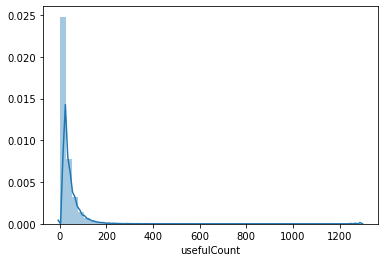

In [46]:
sns.distplot(data['usefulCount'])

(array([89085., 34746., 16187.,  8705.,  4609.,  2729.,  1556.,   951.,
          553.,   392.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

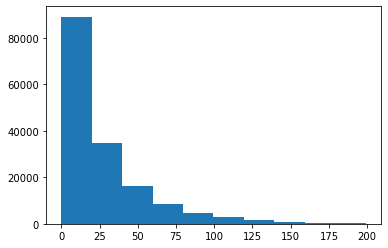

In [17]:
plt.hist(data[data['usefulCount']<200]['usefulCount'])

In [19]:
conditions = data['condition'].value_counts().sort_values(ascending=False)

In [25]:
conditions[:10][0]

28788

Text(0, 0.5, 'Count')

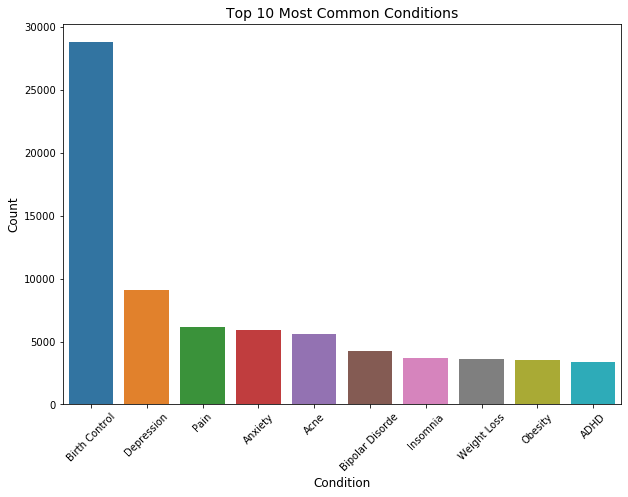

In [40]:
fig, ax = plt.subplots(figsize=(10,7))
p = sns.barplot(x=conditions[:10].index, y=conditions[:10][:10]);
p.set_xticklabels(labels=conditions[:10].index,rotation=45);
plt.title('Top 10 Most Common Conditions', fontsize=14)
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Count', fontsize=12)

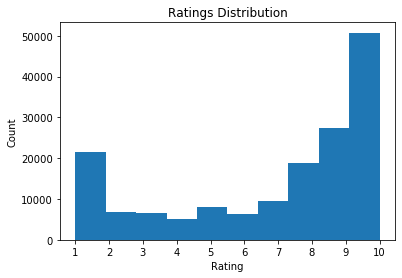

In [45]:
plt.hist(data['rating'])
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks([i for i in range(1, 11)]);

In [50]:
data['condition'].unique()

array(['Left Ventricular Dysfunction', 'ADHD', 'Birth Control',
       'Opiate Dependence', 'Benign Prostatic Hyperplasia',
       'Emergency Contraception', 'Bipolar Disorde', 'Epilepsy',
       'Migraine Prevention', 'Depression', "Crohn's Disease", 'Cough',
       'Obesity', 'Urinary Tract Infection', 'ibromyalgia',
       'Chronic Myelogenous Leukemia', 'HIV Infection', 'Insomnia',
       'Rheumatoid Arthritis', 'Vaginal Yeast Infection',
       'Chlamydia Infection', 'Hirsutism', 'Panic Disorde', 'Migraine',
       'Pain', 'Irritable Bowel Syndrome', 'Osteoarthritis',
       'Constipation', 'Bowel Preparation', 'Psychosis', 'Muscle Spasm',
       'Hepatitis C', 'Overactive Bladde', 'Diabetes, Type 2',
       'Asthma, Maintenance', 'Non-Small Cell Lung Cance',
       'Schizophrenia', 'Dysuria', 'Smoking Cessation', 'Anxiety', 'Acne',
       'emale Infertility', 'Constipation, Acute',
       'Constipation, Drug Induced', 'Erectile Dysfunction',
       'Trigeminal Neuralgia', 'Undera

In [51]:
# condition has things like '2</span> users found this comment helpful.' >> seems to be inaccurate 
data[data['condition'].str.contains('</span>')==True]

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
105,220696,Loestrin 24 Fe,2</span> users found this comment helpful.,"""I&#039;m 16 and I have been on Loestrin 24 f...",3.0,"November 3, 2010",2
196,67383,Provera,4</span> users found this comment helpful.,"""I&#039;m 24 years old and have always had a p...",1.0,"March 27, 2016",4
243,81588,Yaz,3</span> users found this comment helpful.,"""I took Yaz for a little over 2 years. From a...",3.0,"June 1, 2010",3
264,132965,Loestrin 24 Fe,4</span> users found this comment helpful.,"""Took this pill for 1.) Acne and 2.) Birth Con...",2.0,"June 24, 2014",4
391,91050,Norco,11</span> users found this comment helpful.,"""I have suffered with low back pain - 2 surger...",9.0,"March 15, 2009",11
516,189594,Nortrel 1 / 35,0</span> users found this comment helpful.,"""They switched me from Necon to Nortrel saying...",2.0,"August 16, 2017",0
553,220376,Loestrin 24 Fe,0</span> users found this comment helpful.,"""I was on Loestrin 24 Fe for about 6 months an...",7.0,"March 26, 2012",0
571,190387,Ortho Tri-Cyclen Lo,0</span> users found this comment helpful.,"""I love this birth control because no spotting...",9.0,"November 29, 2011",0
678,80302,Alavert D-12 Hour Allergy and Sinus,1</span> users found this comment helpful.,"""I&#039;ve found this product helps to shrink ...",5.0,"April 15, 2016",1
685,173471,Alli,142</span> users found this comment helpful.,"""Started to take Alli 8 days ago and I have al...",9.0,"January 31, 2012",142


In [52]:
# only 0.05% of data is has incorrect 'condition' input, will remove 
900/161297

0.005579768997563501

In [53]:
data = data[data['condition'].str.contains('</span>')==False]

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159498 entries, 0 to 161296
Data columns (total 7 columns):
Unnamed: 0     159498 non-null int64
drugName       159498 non-null object
condition      159498 non-null object
review         159498 non-null object
rating         159498 non-null float64
date           159498 non-null object
usefulCount    159498 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 9.7+ MB


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


Text(0.5, 0, 'Helpful Count')

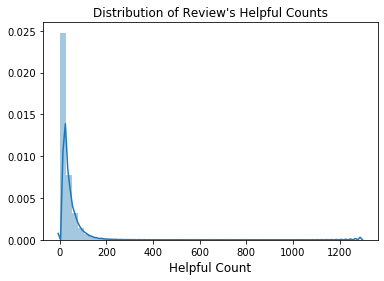

In [90]:
sns.distplot(data['usefulCount'])
plt.title("Distribution of Review's Helpful Counts")
plt.xlabel('Helpful Count', fontsize=12)


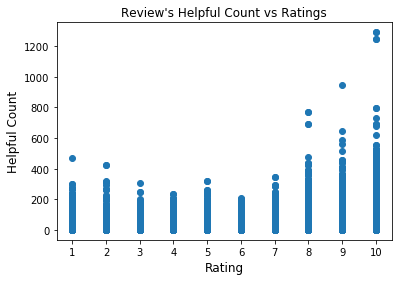

In [91]:
plt.scatter(y=data['usefulCount'], x=data['rating'])
plt.xticks([i for i in range(1, 11)])
plt.title("Review's Helpful Count vs Ratings")
plt.ylabel('Helpful Count', fontsize=12)
plt.xlabel('Rating', fontsize=12);

In [78]:
data_usefulcount_avg = data.groupby('rating')['usefulCount'].mean()
data_usefulcount_avg

rating
1.0     15.771165
2.0     16.508708
3.0     16.170819
4.0     16.672400
5.0     17.622866
6.0     20.069715
7.0     23.420218
8.0     29.359643
9.0     33.779860
10.0    37.789621
Name: usefulCount, dtype: float64

In [62]:
sns.__version__

'0.8.1'

In [63]:
!pip install seaborn --upgrade

    100% |████████████████████████████████| 225kB 17.3MB/s ta 0:00:01
Requirement not upgraded as not directly required: matplotlib>=2.1.2 in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from seaborn) (3.1.0)
Requirement not upgraded as not directly required: numpy>=1.13.3 in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from seaborn) (1.14.3)
Requirement not upgraded as not directly required: pandas>=0.22.0 in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from seaborn) (0.24.2)
Requirement not upgraded as not directly required: scipy>=1.0.1 in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from seaborn) (1.1.0)
Requirement not upgraded as not directly required: python-dateutil>=2.1 in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from matplotlib>=2.1.2->seaborn) (2.7.3)
Requirement not upgraded as not directly required: cycler>=0.10 in /home/ec2-user/anaconda3/envs/python3/lib/pyth

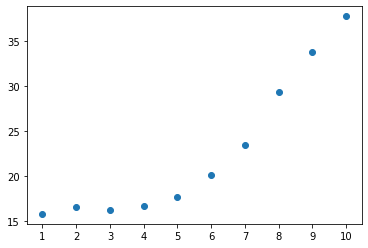

In [80]:
plt.scatter(x=range(1,11), y=data_usefulcount_avg)
plt.xticks([i for i in range(1, 11)]);

In [84]:
data['review_len'] = data['review'].apply(lambda x: len(x.split(' ')))

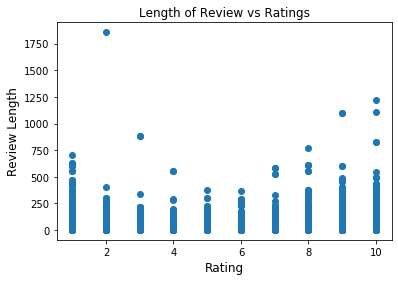

In [92]:
plt.scatter(y=data['review_len'], x=data['rating'])
plt.title("Length of Review vs Ratings")
plt.ylabel('Review Length', fontsize=12)
plt.xlabel('Rating', fontsize=12);

In [87]:
data['count_unique_word']=data["review"].apply(lambda x: len(set(str(x).split())))

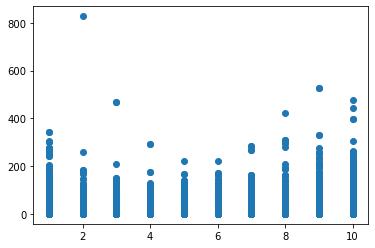

In [88]:
plt.scatter(y=data['count_unique_word'], x=data['rating'])
